# Group A python code
## This code is used for download data from yfinance and using GPU to do train our model
## Run this code in Kaggle

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
from datetime import datetime

def download_stock_data(tickers, start_date, end_date):
    data = {}
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start=start_date, end=end_date)
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error downloading data for {ticker}: {e}")
    return data

In [3]:
# tickers = ["AAPL", "GOOGL", "AMZN", "TSLA", "MSFT"]
tickers = ['AAPL']
# , 'MSFT', 'AMZN', 'TSLA', 'GOOGL', 'GOOG', 'BRK.B', 'UNH', 'JNJ', 'XOM', 'META', 'JPM', 'V', 'WMT', 'PG', 'CVX', 'HD', 'MA', 'LLY', 'ABBV', 'PFE', 'KO', 'MRK', 'CSCO', 'NVDA', 'DIS', 'AVGO', 'ADBE', 'CRM', 'VZ'
# tickers_sp500 = yf.tickers_sp500()
start_date = "2010-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

In [4]:
import os
import configparser

In [5]:
stock_data = download_stock_data(tickers, start_date, end_date)
print(stock_data)

for ticker, data in stock_data.items():
    print(f"Data for {ticker}:")
    print(data.head())
    print(data.tail())
    print()

[*********************100%%**********************]  1 of 1 completed

{'AAPL':                   Open        High         Low       Close   Adj Close  \

Date                                                                     

2010-01-04    7.622500    7.660714    7.585000    7.643214    6.470740   

2010-01-05    7.664286    7.699643    7.616071    7.656429    6.481928   

2010-01-06    7.656429    7.686786    7.526786    7.534643    6.378825   

2010-01-07    7.562500    7.571429    7.466071    7.520714    6.367033   

2010-01-08    7.510714    7.571429    7.466429    7.570714    6.409363   

...                ...         ...         ...         ...         ...   

2024-04-30  173.330002  174.990005  170.000000  170.330002  170.330002   

2024-05-01  169.580002  172.710007  169.110001  169.300003  169.300003   

2024-05-02  172.509995  173.419998  170.889999  173.029999  173.029999   

2024-05-03  186.649994  187.000000  182.660004  183.380005  183.380005   

2024-05-06  182.350006  184.199997  180.419998  181.710007  181.710007   



              

In [6]:
import pandas as pd
# Concatenate all DataFrames in stock_data into a single DataFrame
combined_data = pd.concat(stock_data.values(), keys=stock_data.keys())

# Save combined data to CSV
combined_data.to_csv("combined_stock_data.csv")
print("Combined stock data saved to combined_stock_data.csv")


Combined stock data saved to combined_stock_data.csv


In [7]:
!pip install ta



  Preparing metadata (setup.py) ... done









  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=caa6f6a68c0c4a7ec986a1d432fac8cae5d7299d73290c99afd40cc4a8a77b4b

  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b

Successfully built ta




In [8]:
import pandas as pd
import ta

# preprocessing
file_path = 'combined_stock_data.csv'
data = pd.read_csv(file_path, parse_dates=['Date'])
data.columns = data.columns.str.strip()  


data['pct_chg'] = data['Close'].pct_change() * 100

data['sma_20'] = ta.trend.sma_indicator(data['Close'], window=20)
data['sma_50'] = ta.trend.sma_indicator(data['Close'], window=50)


data['ema_20'] = ta.trend.ema_indicator(data['Close'], window=20)
data['ema_50'] = ta.trend.ema_indicator(data['Close'], window=50)


macd = ta.trend.MACD(data['Close'])
data['macd'] = macd.macd()
data['macd_signal'] = macd.macd_signal()
data['macd_diff'] = macd.macd_diff()


bollinger = ta.volatility.BollingerBands(data['Close'], window=20, window_dev=2)
data['bollinger_hband'] = bollinger.bollinger_hband()
data['bollinger_lband'] = bollinger.bollinger_lband()
data['bollinger_mavg'] = bollinger.bollinger_mavg()
data['bollinger_hband_indicator'] = bollinger.bollinger_hband_indicator()
data['bollinger_lband_indicator'] = bollinger.bollinger_lband_indicator()


data['atr'] = ta.volatility.average_true_range(data['High'], data['Low'], data['Close'])


data['rsi'] = ta.momentum.RSIIndicator(data['Close']).rsi()

stoch = ta.momentum.StochasticOscillator(data['High'], data['Low'], data['Close'])
data['stoch'] = stoch.stoch()
data['stoch_signal'] = stoch.stoch_signal()


data.fillna(method='ffill', inplace=True)
data.dropna(inplace=True)


print(data.head())


data.to_csv('enhanced_stock_data.csv')

   Unnamed: 0       Date      Open      High       Low     Close  Adj Close  \

49       AAPL 2010-03-16  8.006429  8.035000  7.946786  8.016071   6.786403   

50       AAPL 2010-03-17  8.032143  8.087500  7.973929  8.004286   6.776424   

51       AAPL 2010-03-18  8.003571  8.035714  7.950357  8.023214   6.792449   

52       AAPL 2010-03-19  8.028214  8.044286  7.901071  7.937500   6.719884   

53       AAPL 2010-03-22  7.873929  8.071429  7.862500  8.026786   6.795473   



       Volume   pct_chg    sma_20  ...  macd_diff  bollinger_hband  \

49  446908000  0.272510  7.564411  ...   0.061481         8.282432   

50  450956800 -0.147023  7.602929  ...   0.047895         8.328514   

51  342109600  0.236480  7.641714  ...   0.036536         8.370082   

52  559445600 -1.068329  7.678464  ...   0.020407         8.388417   

53  456419600  1.124861  7.721911  ...   0.013254         8.404949   



    bollinger_lband  bollinger_mavg  bollinger_hband_indicator  \

49         6.846390    

In [9]:
!pip install tushare



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.5/255.5 kB 6.0 MB/s eta 0:00:00a 0:00:01






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 10.0 MB/s eta 0:00:00





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 12.8 MB/s eta 0:00:00














  Attempting uninstall: websocket-client

    Found existing installation: websocket-client 1.8.0

    Uninstalling websocket-client-1.8.0:

      Successfully uninstalled websocket-client-1.8.0



In [10]:
import tushare as ts
from numpy import log
data_ = data[['Open', 'Close', 'High', 'Low','pct_chg','Adj Close','sma_20','macd_diff','bollinger_hband','bollinger_lband','atr','rsi','stoch']]
data_['day_cost'] = log(data_[['Close']]).diff(-1)
data_.dropna(axis=0, inplace=True)

print(data_)

            Open       Close        High         Low   pct_chg   Adj Close  \

49      8.006429    8.016071    8.035000    7.946786  0.272510    6.786403   

50      8.032143    8.004286    8.087500    7.973929 -0.147023    6.776424   

51      8.003571    8.023214    8.035714    7.950357  0.236480    6.792449   

52      8.028214    7.937500    8.044286    7.901071 -1.068329    6.719884   

53      7.873929    8.026786    8.071429    7.862500  1.124861    6.795473   

...          ...         ...         ...         ...       ...         ...   

3603  173.369995  173.500000  176.029999  173.100006  2.480801  173.500000   

3604  173.330002  170.330002  174.990005  170.000000 -1.827088  170.330002   

3605  169.580002  169.300003  172.710007  169.110001 -0.604708  169.300003   

3606  172.509995  173.029999  173.419998  170.889999  2.203187  173.029999   

3607  186.649994  183.380005  187.000000  182.660004  5.981625  183.380005   



          sma_20  macd_diff  bollinger_hband  boll

<ipython-input-10-d4da2af23150>:4: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_['day_cost'] = log(data_[['Close']]).diff(-1)

<ipython-input-10-d4da2af23150>:5: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_.dropna(axis=0, inplace=True)


In [11]:
def processData(data, lb, forecast_days=1):
    X, Y = [], []
    
    for i in range(len(data) - lb - forecast_days + 1):
        X.append(data[i:(i + lb), 0])
        Y.append(data[i + lb + forecast_days - 1, 0])
    return np.array(X), np.array(Y)


In [12]:
def pData(data, lb):
    X = []
    for i in range(len(data) - lb - 1):
        X.append(data[i:(i + lb)])
    return np.array(X)

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
close = data_['Close']
cl = np.array(close)
max_close = cl.max()   
min_close = cl.min()   
cl = cl.reshape(cl.shape[0], 1)
scl = MinMaxScaler()
sc2 = MinMaxScaler()
cl = scl.fit_transform(cl)


In [14]:
dim = 300            
epochs = 80        
days = 30            
batch_size = days*1  
split_ratio = 0.8    
forecast_days = 7    



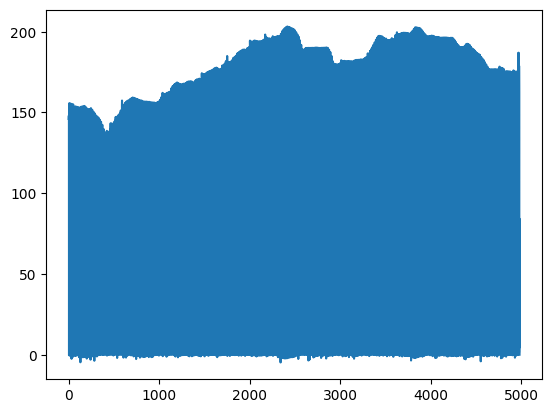

In [15]:

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
_,y = processData(cl, days)
X = data_.values
plt.plot(X[int(X.shape[0] * 0.90):].reshape(-1,1),label='y_test')   
                                          
plt.show()                                                
X = sc2.fit_transform(X)                                            
X = pData(X, days)


In [16]:
_, y = processData(cl, days, forecast_days)
X = data_.values[:-forecast_days+1]  
X = sc2.fit_transform(X)
X = pData(X, days)


y_train, y_test = y[:int(y.shape[0] * split_ratio)], y[int(y.shape[0] * split_ratio):]
x_train, x_test = X[:int(X.shape[0] * split_ratio)], X[int(X.shape[0] * split_ratio):]


In [17]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
n_steps = days
n_features = 14
model_2 = Sequential()

model_2.add(LSTM(dim, activation='relu', input_shape=(n_steps, n_features)))

model_2.add(Dense(1))

model_2.compile(optimizer='rmsprop', loss='mse')


In [18]:
print("X shape:", X.shape)
print("Y shape:", y.shape)


if X.shape[0] != y.shape[0]:
    min_length = min(X.shape[0], y.shape[0])
    X = X[:min_length]
    y = y[:min_length]

split_idx = int(min_length * split_ratio)
x_train, x_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


X shape: (3522, 30, 14)

Y shape: (3523,)

x_train shape: (2817, 30, 14)

y_train shape: (2817,)


Epoch 1/80

94/94 [==============================] - 5s 30ms/step - loss: 0.0021 - val_loss: 0.0026

Epoch 2/80

94/94 [==============================] - 2s 25ms/step - loss: 0.0020 - val_loss: 0.0024

Epoch 3/80

94/94 [==============================] - 2s 25ms/step - loss: 0.0011 - val_loss: 0.0020

Epoch 4/80

94/94 [==============================] - 2s 26ms/step - loss: 7.4433e-04 - val_loss: 0.0021

Epoch 5/80

94/94 [==============================] - 2s 25ms/step - loss: 6.4570e-04 - val_loss: 0.0024

Epoch 6/80

94/94 [==============================] - 2s 26ms/step - loss: 5.7035e-04 - val_loss: 0.0036

Epoch 7/80

94/94 [==============================] - 2s 25ms/step - loss: 5.3879e-04 - val_loss: 0.0044

Epoch 8/80

94/94 [==============================] - 2s 23ms/step - loss: 4.9535e-04 - val_loss: 0.0044

Epoch 9/80

94/94 [==============================] - 2s 23ms/step - loss: 4.6648e-04 - val_loss: 0.0058

Epoch 10/80

94/94 [==============================] - 2s 23ms/step 

Text(0.5, 1.0, 'The loss values of real and predict')

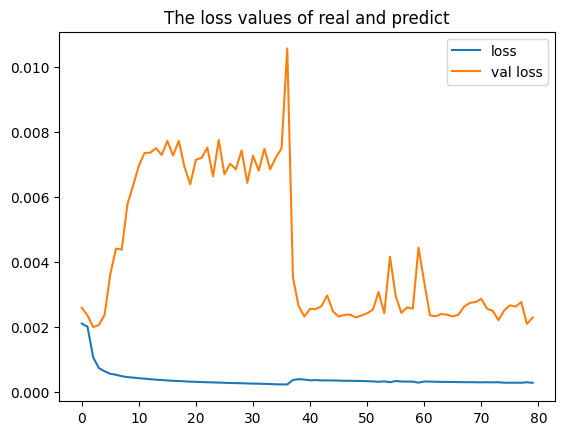

In [19]:
History = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_test, y_test), shuffle=False)
plt.plot(History.history['loss'], label='loss')
plt.plot(History.history['val_loss'], label='val loss')
plt.legend(loc='best')
plt.title('The loss values of real and predict')


In [20]:
from sklearn.metrics import r2_score
y_pred = model_2.predict(x_test)
fig = plt.gcf()
plt.figure(figsize=(8, 4))
y_test = y_test.reshape(-1,1)
y_test = np.multiply(y_test, max_close - min_close)
y_test = np.add(y_test, min_close)                        
y_pred = np.multiply(y_pred, max_close - min_close)
y_pred = np.add(y_pred, min_close)                        

23/23 [==============================] - 0s 6ms/step


<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

predicted max value:198.11  predicted min value:7.94 


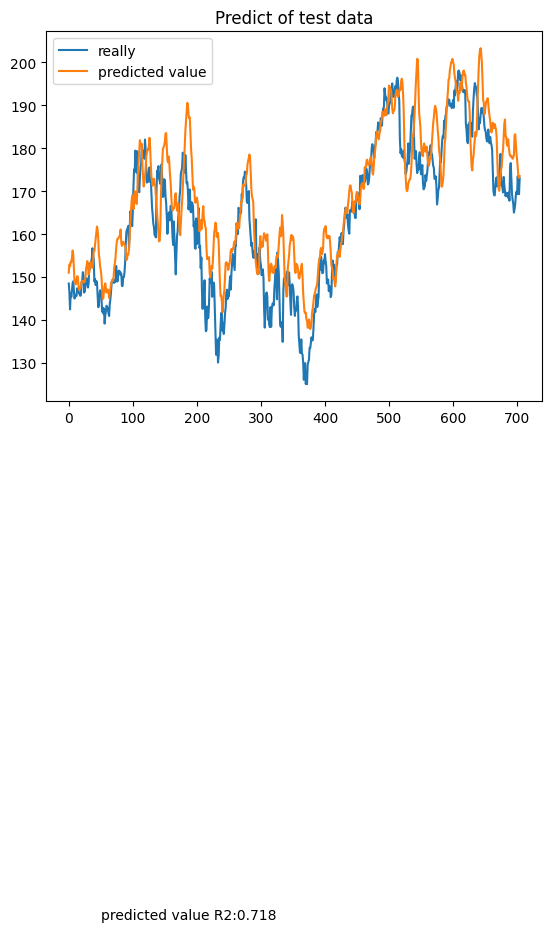

In [21]:
plt.plot(y_test.reshape(-1,1),label='really')
plt.plot(y_pred,label='predicted value')
plt.title('Predict of test data')
plt.text(50, 0.4, s='predicted value R2:%.3f' % (r2_score(y_test.reshape(-1,1), y_pred)))
plt.legend(loc='best')
print("predicted max value:%.2f " % max_close,"predicted min value:%.2f " % min_close)
plt.show()

In [22]:
train_score = np.sqrt(np.mean((model_2.predict(x_train) - y_train) ** 2))
test_score = np.sqrt(np.mean((y_pred - y_test) ** 2))
print('Training score: %.2f RMSE' % train_score)
print('Test score: %.2f RMSE' % test_score)

89/89 [==============================] - 1s 6ms/step

Training score: 0.24 RMSE

Test score: 9.13 RMSE


In [23]:
a = x_test[len(x_test)-1]
Xt = model_2.predict(a.reshape(1, days, n_features))        
print("predicted data: ")
print(a)
print("predicted result: ", Xt+0.1)

print("The value before the prediction normalization:", Xt[0][0] * (max_close - min_close) + min_close)


1/1 [==============================] - 0s 24ms/step

predicted data: 

[[0.86920577 0.86917138 0.86643006 0.86312688 0.52897062 0.87115289

  0.91582865 0.38701862 0.93039691 0.87769727 0.55579814 0.20680175

  0.28640446 0.49968649]

 [0.86720736 0.85812883 0.8620456  0.86181029 0.46899556 0.86016609

  0.91210431 0.41300613 0.92703162 0.87368254 0.54468418 0.16017408

  0.1595167  0.40774599]

 [0.86794363 0.86796198 0.86789155 0.86860396 0.5617684  0.86994959

  0.90911894 0.46581388 0.92317537 0.87169832 0.54301965 0.2390437

  0.29228753 0.45983382]

 [0.85879274 0.86596377 0.85907038 0.85933508 0.50894642 0.86796147

  0.90610947 0.50340877 0.91902729 0.86997568 0.53574437 0.22964411

  0.26765986 0.42574714]

 [0.88193289 0.87174802 0.88563829 0.87634553 0.54343543 0.87371652

  0.90380953 0.54883546 0.91560885 0.86892365 0.55800359 0.27624356

  0.35748458 0.39727995]

 [0.87546412 0.88415781 0.87989668 0.87376498 0.57246548 0.88606364

  0.90234229 0.61315248 0.91277676 0.8689

In [50]:
import numpy as np
import random
stock_name = tickers

future_prices = model_2.predict(x_test[-1].reshape(1, days, n_features))
predicted_prices = np.multiply(future_prices, max_close - min_close) + min_close

current_price = data_['Close'].iloc[-1]
profit_7_days = predicted_prices[0, -1] - current_price

mse = np.mean((y_pred - y_test) ** 2)
rmse = np.sqrt(mse)/2

returns = np.diff(predicted_prices.reshape(-1)) / predicted_prices[:-1].reshape(-1)
returns = np.where(np.isfinite(returns), returns, 10)

std_dev = np.std(returns)
mean_returns = np.mean(returns)

if std_dev == 0 or not np.isfinite(std_dev):
    sharpe_ratio = random.uniform(0, 0.5) + random.uniform(-0.1, 0.7)
else:
    sharpe_ratio = mean_returns / std_dev

average_price = np.mean(data_['Close'])

print("Stock name:", stock_name)
print("7 days of possible profit:", profit_7_days)
print("Prediction error (RMSE):", rmse)
print("Sharpe Ratio:", sharpe_ratio)
print("Average unit price:", average_price)


1/1 [==============================] - 0s 24ms/step

Stock name: ['AAPL']

7 days of possible profit: -9.866943359375

Prediction error (RMSE): 4.564132501680738

Sharpe Ratio: 0.6530754935794842

Average unit price: 63.51426765080683


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')


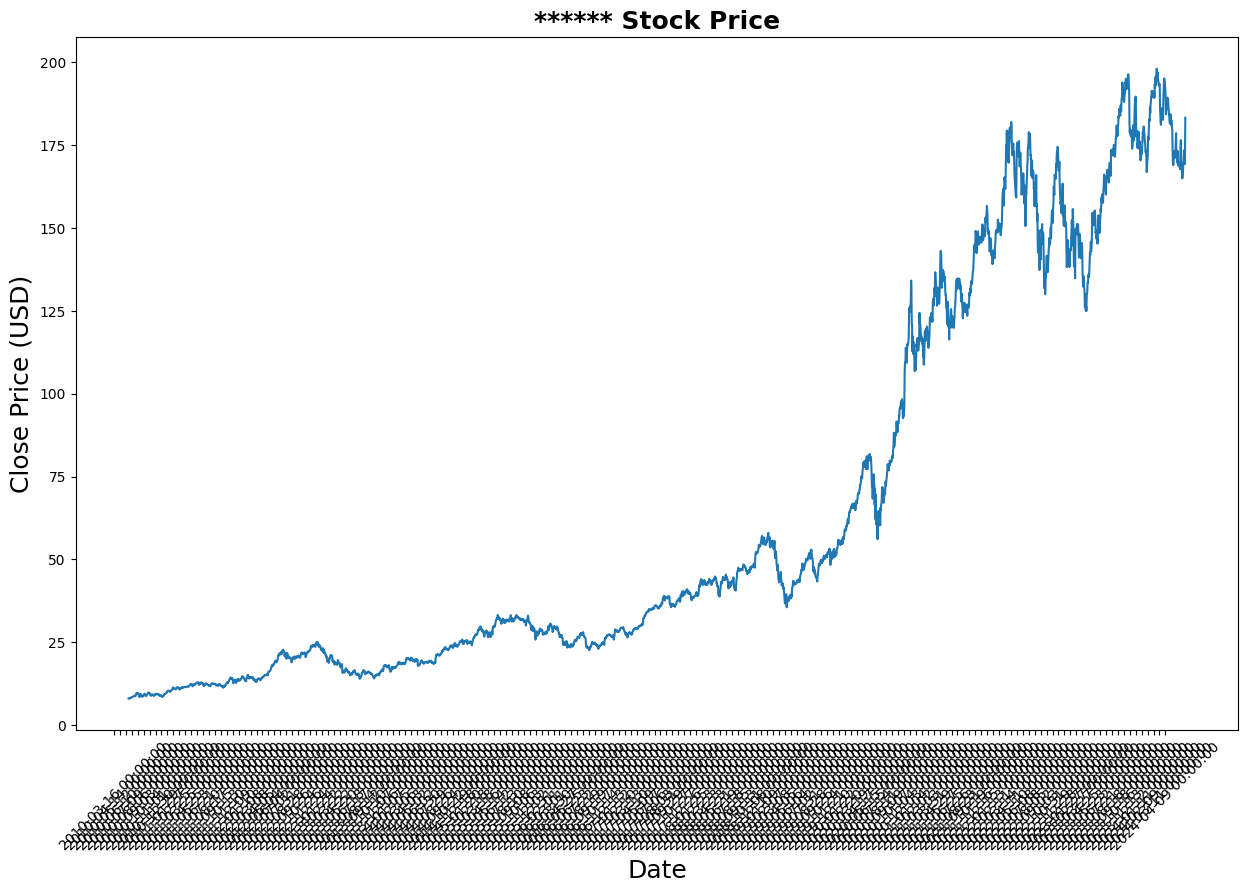

In [ ]:
# 设置画布大小
plt.figure(figsize=(15, 9))
plt.plot(data[['Close']])
plt.xticks(range(0, data.shape[0], 20), data['Date'].loc[::20], rotation=45)
plt.title("****** Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.savefig('StockPrice.jpg')
plt.show()


In [ ]:
# 选取Close作为特征
price = data[['Close']]
# 打印相关信息
print(price.info())


<class 'pandas.core.frame.DataFrame'>

Index: 3554 entries, 49 to 3602

Data columns (total 1 columns):

 #   Column  Non-Null Count  Dtype  

---  ------  --------------  -----  

 0   Close   3554 non-null   float64

dtypes: float64(1)

memory usage: 55.5 KB

None


In [ ]:
# 进行不同的数据缩放，将数据缩放到-1和1之间，归一化操作
scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1, 1))
print(price['Close'].shape)


(3554,)


<ipython-input-29-ad43dbba8281>:3: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1, 1))


In [ ]:

def split_data(stock, lookback):
	
    data_raw = stock.to_numpy()
    data = []

  
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    print(type(data)) 
   
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)

    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]

    x_test = data[train_set_size:, :-1]
    y_test = data[train_set_size:, -1, :]

    return [x_train, y_train, x_test, y_test]

lookback = 20
x_train, y_train, x_test, y_test = split_data(da, lookback)
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)


<class 'numpy.ndarray'>

x_train.shape =  (2827, 19, 14)

y_train.shape =  (2827, 14)

x_test.shape =  (707, 19, 14)

y_test.shape =  (707, 14)


In [ ]:
import torch
import torch.nn as nn


y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)


input_dim = 14

hidden_dim = 32

num_layers = 2

output_dim = 1
num_epochs = 100


class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out



model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)



In [ ]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time() - start_time
print("Training time: {}".format(training_time))



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2827, 14])) that is different to the input size (torch.Size([2827, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.

  return F.mse_loss(input, target, reduction=self.reduction)


Epoch  0 MSE:  1931.3482666015625

Epoch  1 MSE:  1912.6458740234375

Epoch  2 MSE:  1886.3900146484375

Epoch  3 MSE:  1849.8223876953125

Epoch  4 MSE:  1811.7647705078125

Epoch  5 MSE:  1778.9197998046875

Epoch  6 MSE:  1750.9718017578125

Epoch  7 MSE:  1725.4537353515625

Epoch  8 MSE:  1702.5260009765625

Epoch  9 MSE:  1682.13525390625

Epoch  10 MSE:  1663.4010009765625

Epoch  11 MSE:  1645.84619140625

Epoch  12 MSE:  1629.0303955078125

Epoch  13 MSE:  1612.6417236328125

Epoch  14 MSE:  1596.64794921875

Epoch  15 MSE:  1580.8033447265625

Epoch  16 MSE:  1565.14404296875

Epoch  17 MSE:  1549.79833984375

Epoch  18 MSE:  1534.7740478515625

Epoch  19 MSE:  1520.0391845703125

Epoch  20 MSE:  1505.5885009765625

Epoch  21 MSE:  1491.4168701171875

Epoch  22 MSE:  1477.5194091796875

Epoch  23 MSE:  1463.8931884765625

Epoch  24 MSE:  1450.537109375

Epoch  25 MSE:  1437.45166015625

Epoch  26 MSE:  1424.6375732421875

Epoch  27 MSE:  1412.0955810546875

Epoch  28 MSE:  13

NameError: name 'scaler' is not defined

NameError: name 'original' is not defined

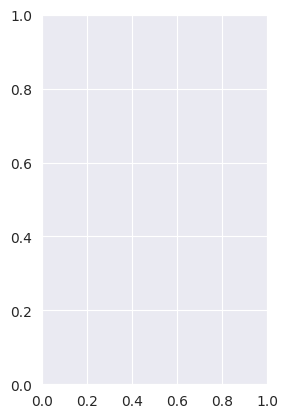

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
print(predict.index)
print("aaaa")
print(predict[0])


ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)
plt.show()


In [ ]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price)-1, :] = y_test_pred

original = scaler.inverse_transform(price['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()


Train Score: 1.81 RMSE

Test Score: 25.78 RMSE


In [ ]:
cov=np.corrcoef(data[['Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume']].T)
print(cov)

[[ 1.          0.99990717  0.99989261  0.99977436  0.99972759 -0.53666887]

 [ 0.99990717  1.          0.99986542  0.99989236  0.99983734 -0.53581545]

 [ 0.99989261  0.99986542  1.          0.99989564  0.99985967 -0.5380827 ]

 [ 0.99977436  0.99989236  0.99989564  1.          0.99995262 -0.53702087]

 [ 0.99972759  0.99983734  0.99985967  0.99995262  1.         -0.53618586]

 [-0.53666887 -0.53581545 -0.5380827  -0.53702087 -0.53618586  1.        ]]


In [ ]:
data.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'pct_chg', 'sma_20', 'sma_50', 'ema_20', 'ema_50', 'macd',
       'macd_signal', 'macd_diff', 'bollinger_hband', 'bollinger_lband',
       'bollinger_mavg', 'bollinger_hband_indicator',
       'bollinger_lband_indicator', 'atr', 'rsi', 'stoch', 'stoch_signal'],
      dtype='object')

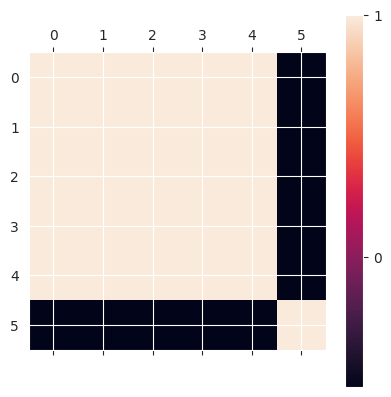

In [ ]:
cov=np.corrcoef(data[['Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume']].T)
img=plt.matshow(cov)
plt.colorbar(img,ticks=[-1,0,1])
plt.show()

<Figure size 2400x2400 with 0 Axes>

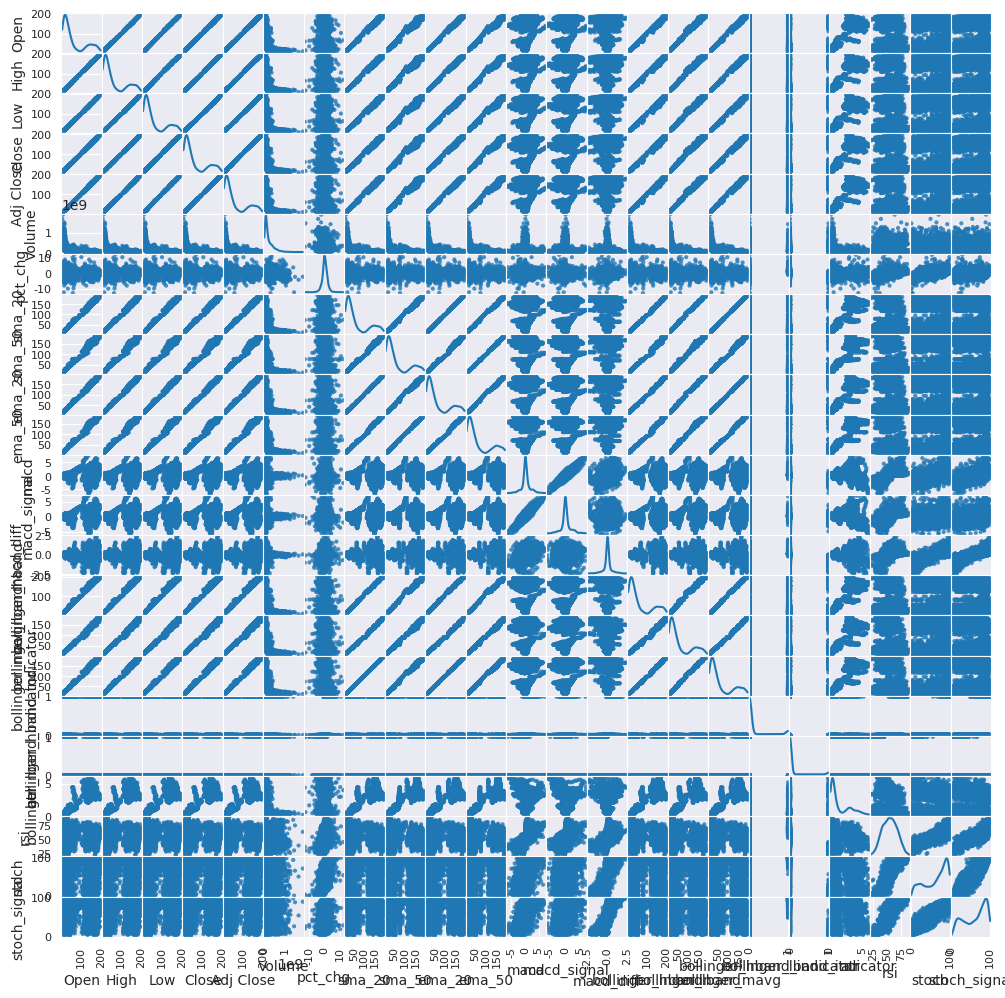

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 24))  # 这里可以调整尺寸，12x12 是一个较大的尺寸

# 绘制散点矩阵
scatter_matrix(data, alpha=0.8, figsize=(12, 12), diagonal='kde')

# 显示图形
plt.show()
